In [ ]:
import pandas as pd

# 假设有大量数据需要处理,使用列表收集数据
simulation_data = []

# 模拟数据生成过程
for sim_id in range(1000):  # 假设有1000轮模拟
    for capture in range(0, 1001, 10):  # 捕食数目从0到1000,步长为10
        # 这里应该是你的模拟函数或某种数据生成方式
        nsteps = capture + 5  # 示例的步数计算
        simulation_data.append({"Environment": "Env1", "Simulation": sim_id, "NCapture": capture, "NSteps": nsteps})

# 一次性创建 DataFrame
df = pd.DataFrame(simulation_data)

# 转换数据类型以节省内存
df['NCapture'] = df['NCapture'].astype('int16')
df['NSteps'] = df['NSteps'].astype('int32')
df['Simulation'] = df['Simulation'].astype('int16')
df['Environment'] = df['Environment'].astype('category')

# 分组计算平均步数
average_nsteps = df.groupby('NCapture').agg({'NSteps': 'mean'}).reset_index()

print(average_nsteps)

# 可选:保存到 CSV
df.to_csv("data/nsteps_ncapture.csv", index=False)
average_nsteps.to_csv("data/ave_nsteps_ncapture.csv", index=False)

In [ ]:
# 将新数据追加到已存在的 CSV 文件中
csv_file_path = 'average_nsteps.csv'  # 指定文件路径

# 检查文件是否已存在,如果不存在,先写入头部
import os
if not os.path.isfile(csv_file_path):
    new_df.to_csv(csv_file_path, mode='w', index=False)  # 写入头部
else:
    new_df.to_csv(csv_file_path, mode='a', index=False, header=False)  # 追加数据,不包含头部

# No put-back

In [1]:
import gymnasium as gym
import numpy as np
import sys
# 添加到 sys.path
sys.path.append('..')
import environment
from agents.my_policies import GreedyPolicy
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO
import gymnasium as gym
import yaml
from stable_baselines3.common.evaluation import evaluate_policy

# 设置环境ID和配置ID
env_id = 'PredatorPrey-v0'
config_id = 'default_7'

# 读取配置文件
with open('../params/env_configs.yaml', 'r') as file:
    env_config = yaml.safe_load(file)[env_id][config_id]

env = gym.make(env_id, **env_config)

## Smart

### Data

In [54]:
model_path = '../output/checkpoints/default_8/put_back_v0_7680000_steps.zip'
smart_policy = PPO.load(model_path)

### Plot

In [55]:
# read from csv
import pandas as pd
smart_df = pd.read_csv('data/nstep_ncap_eval_0_smart_1000.csv')

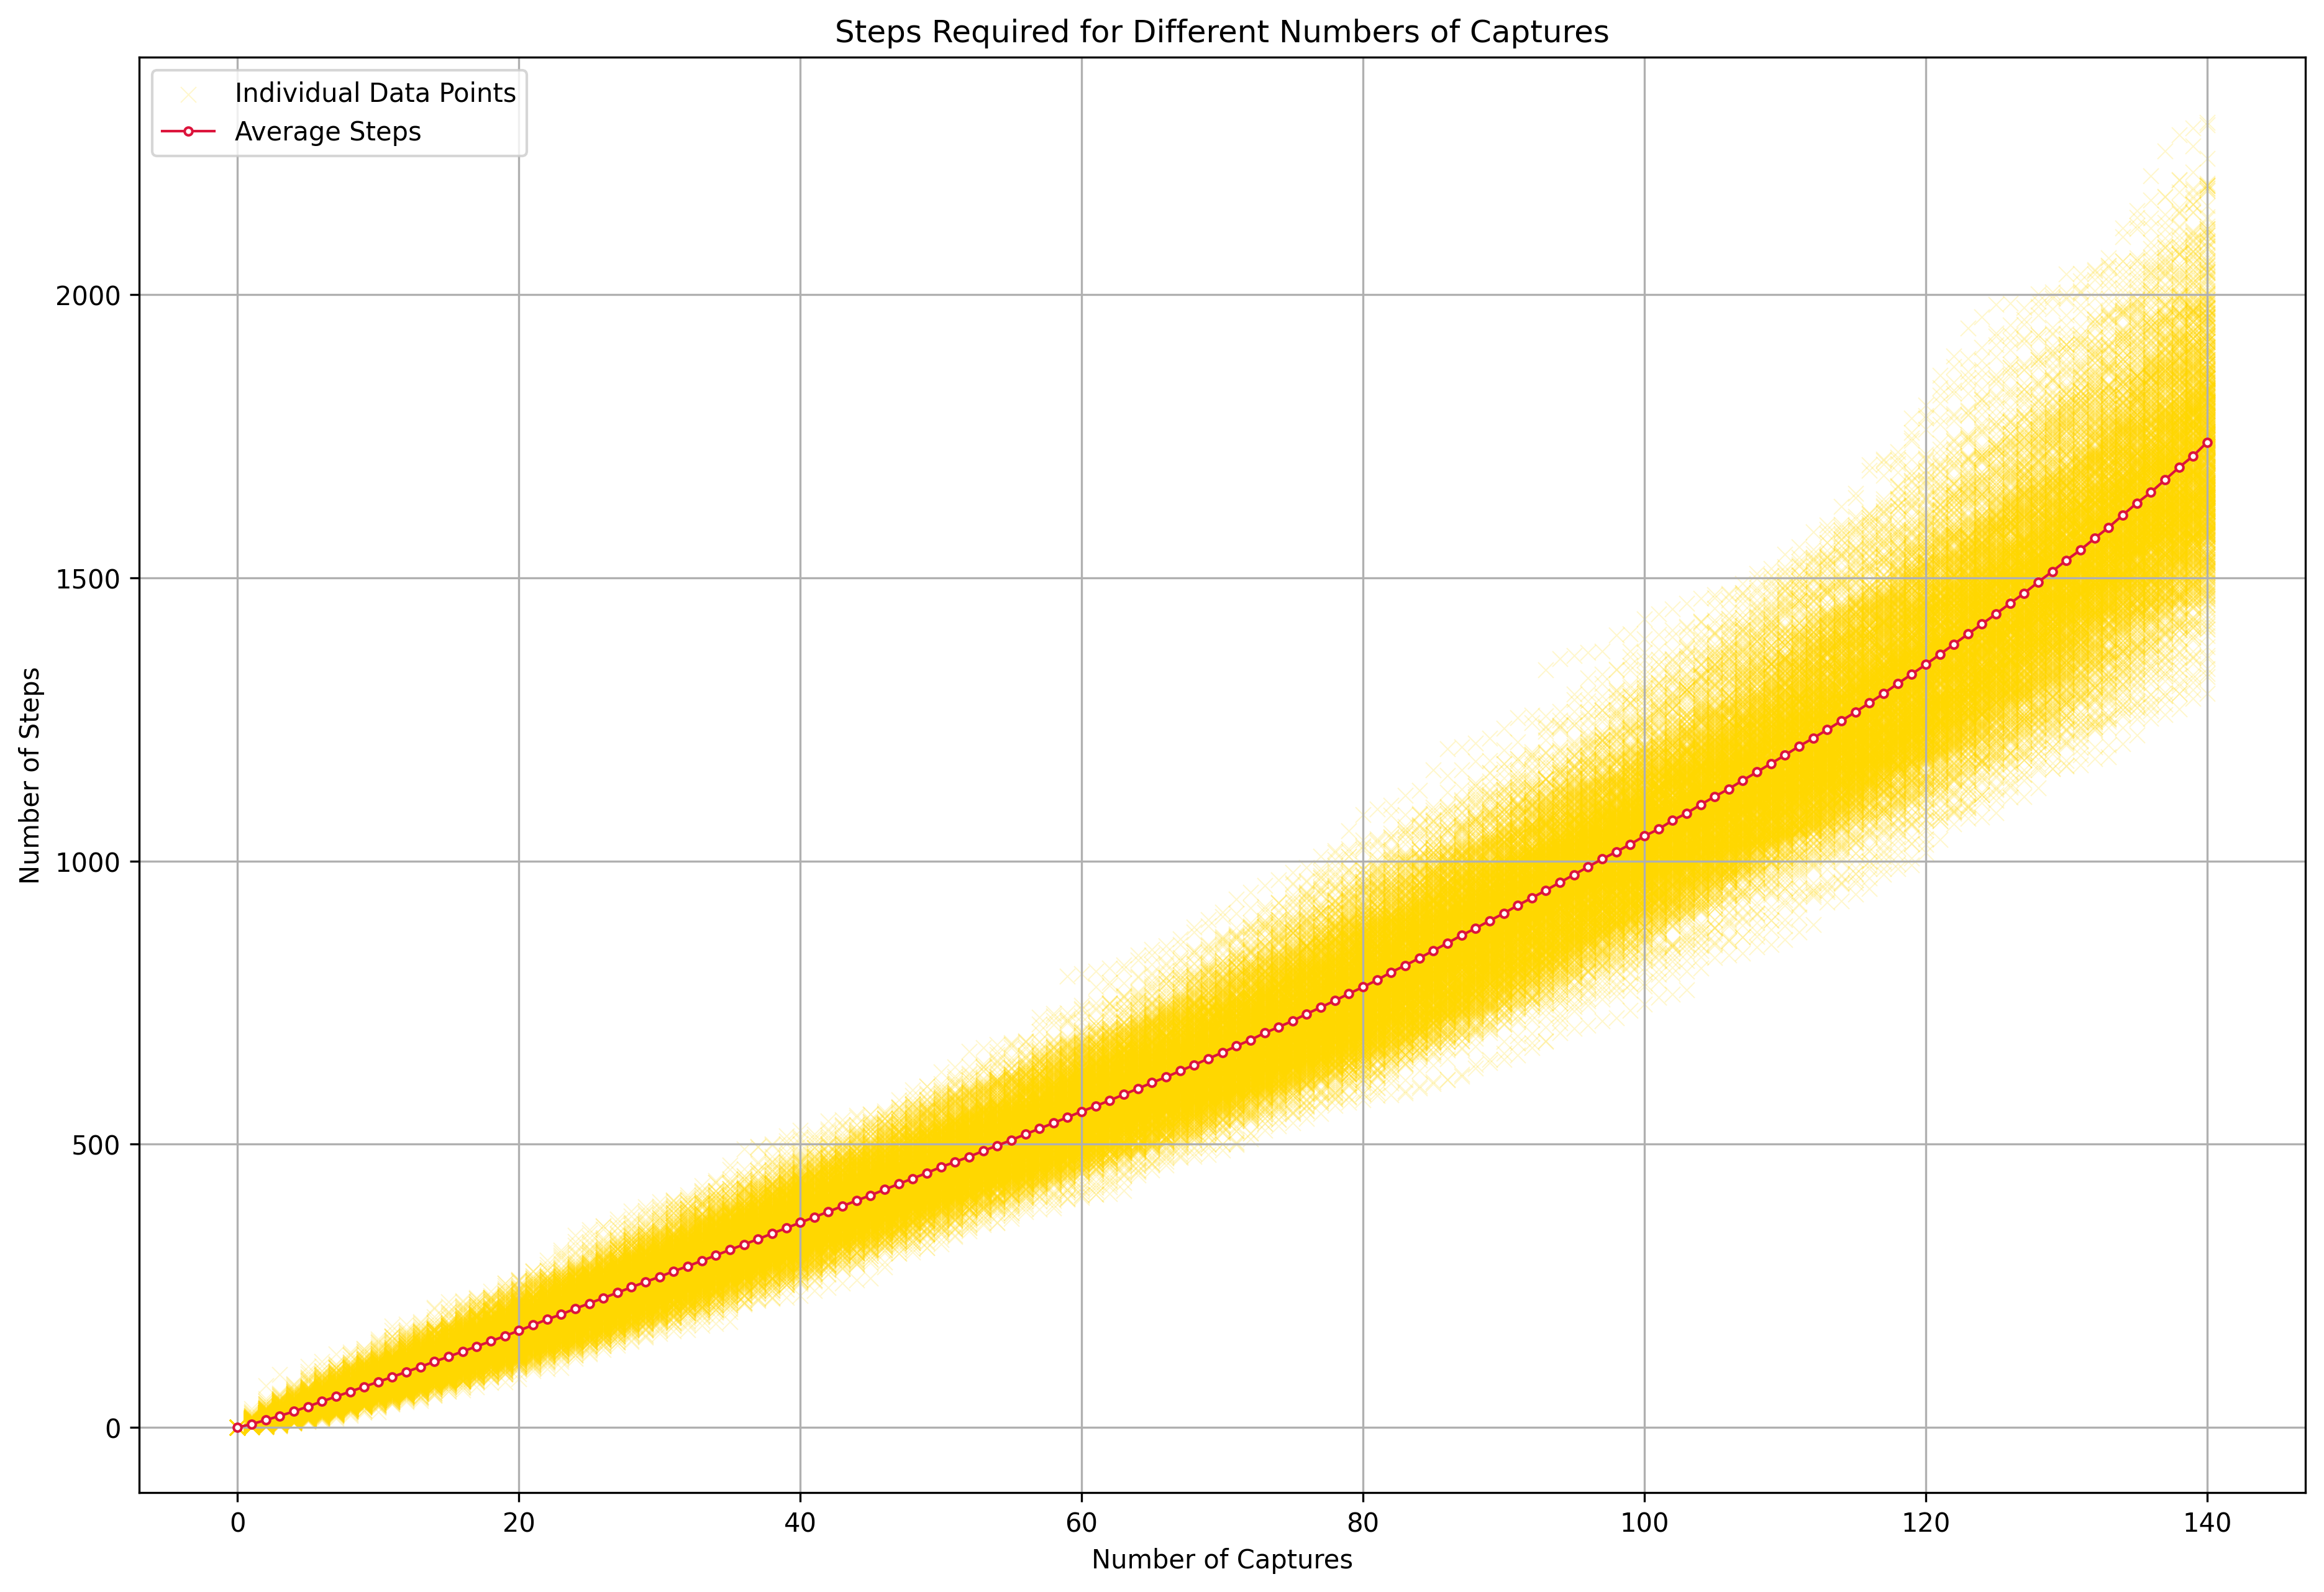

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

data = smart_df.copy()
# Drop datas woth the largest number of captures
data = data[data['n_capture'] < data['n_capture'].max()]
# Calculating the mean of steps for each capture number
mean_steps = data.groupby('n_capture')['n_steps'].mean()

# Creating the plot
plt.figure(figsize=(15, 10), dpi=300)

# Scatter plot for raw data
sns.scatterplot(x=data['n_capture'], 
                y=data['n_steps'], 
                alpha=0.2, marker='x', 
                color='gold', 
                label='Individual Data Points')

# Line plot for the mean steps per capture number
sns.lineplot(x=mean_steps.index, 
            y=mean_steps.values, 
            label='Average Steps', 
            color='crimson', 
            linewidth=1, marker='o', 
            markersize=3, 
            markeredgewidth=1, 
            markerfacecolor='white', 
            markeredgecolor='crimson')

# Adding labels and title
plt.title('Steps Required for Different Numbers of Captures')
plt.xlabel('Number of Captures')
plt.ylabel('Number of Steps')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


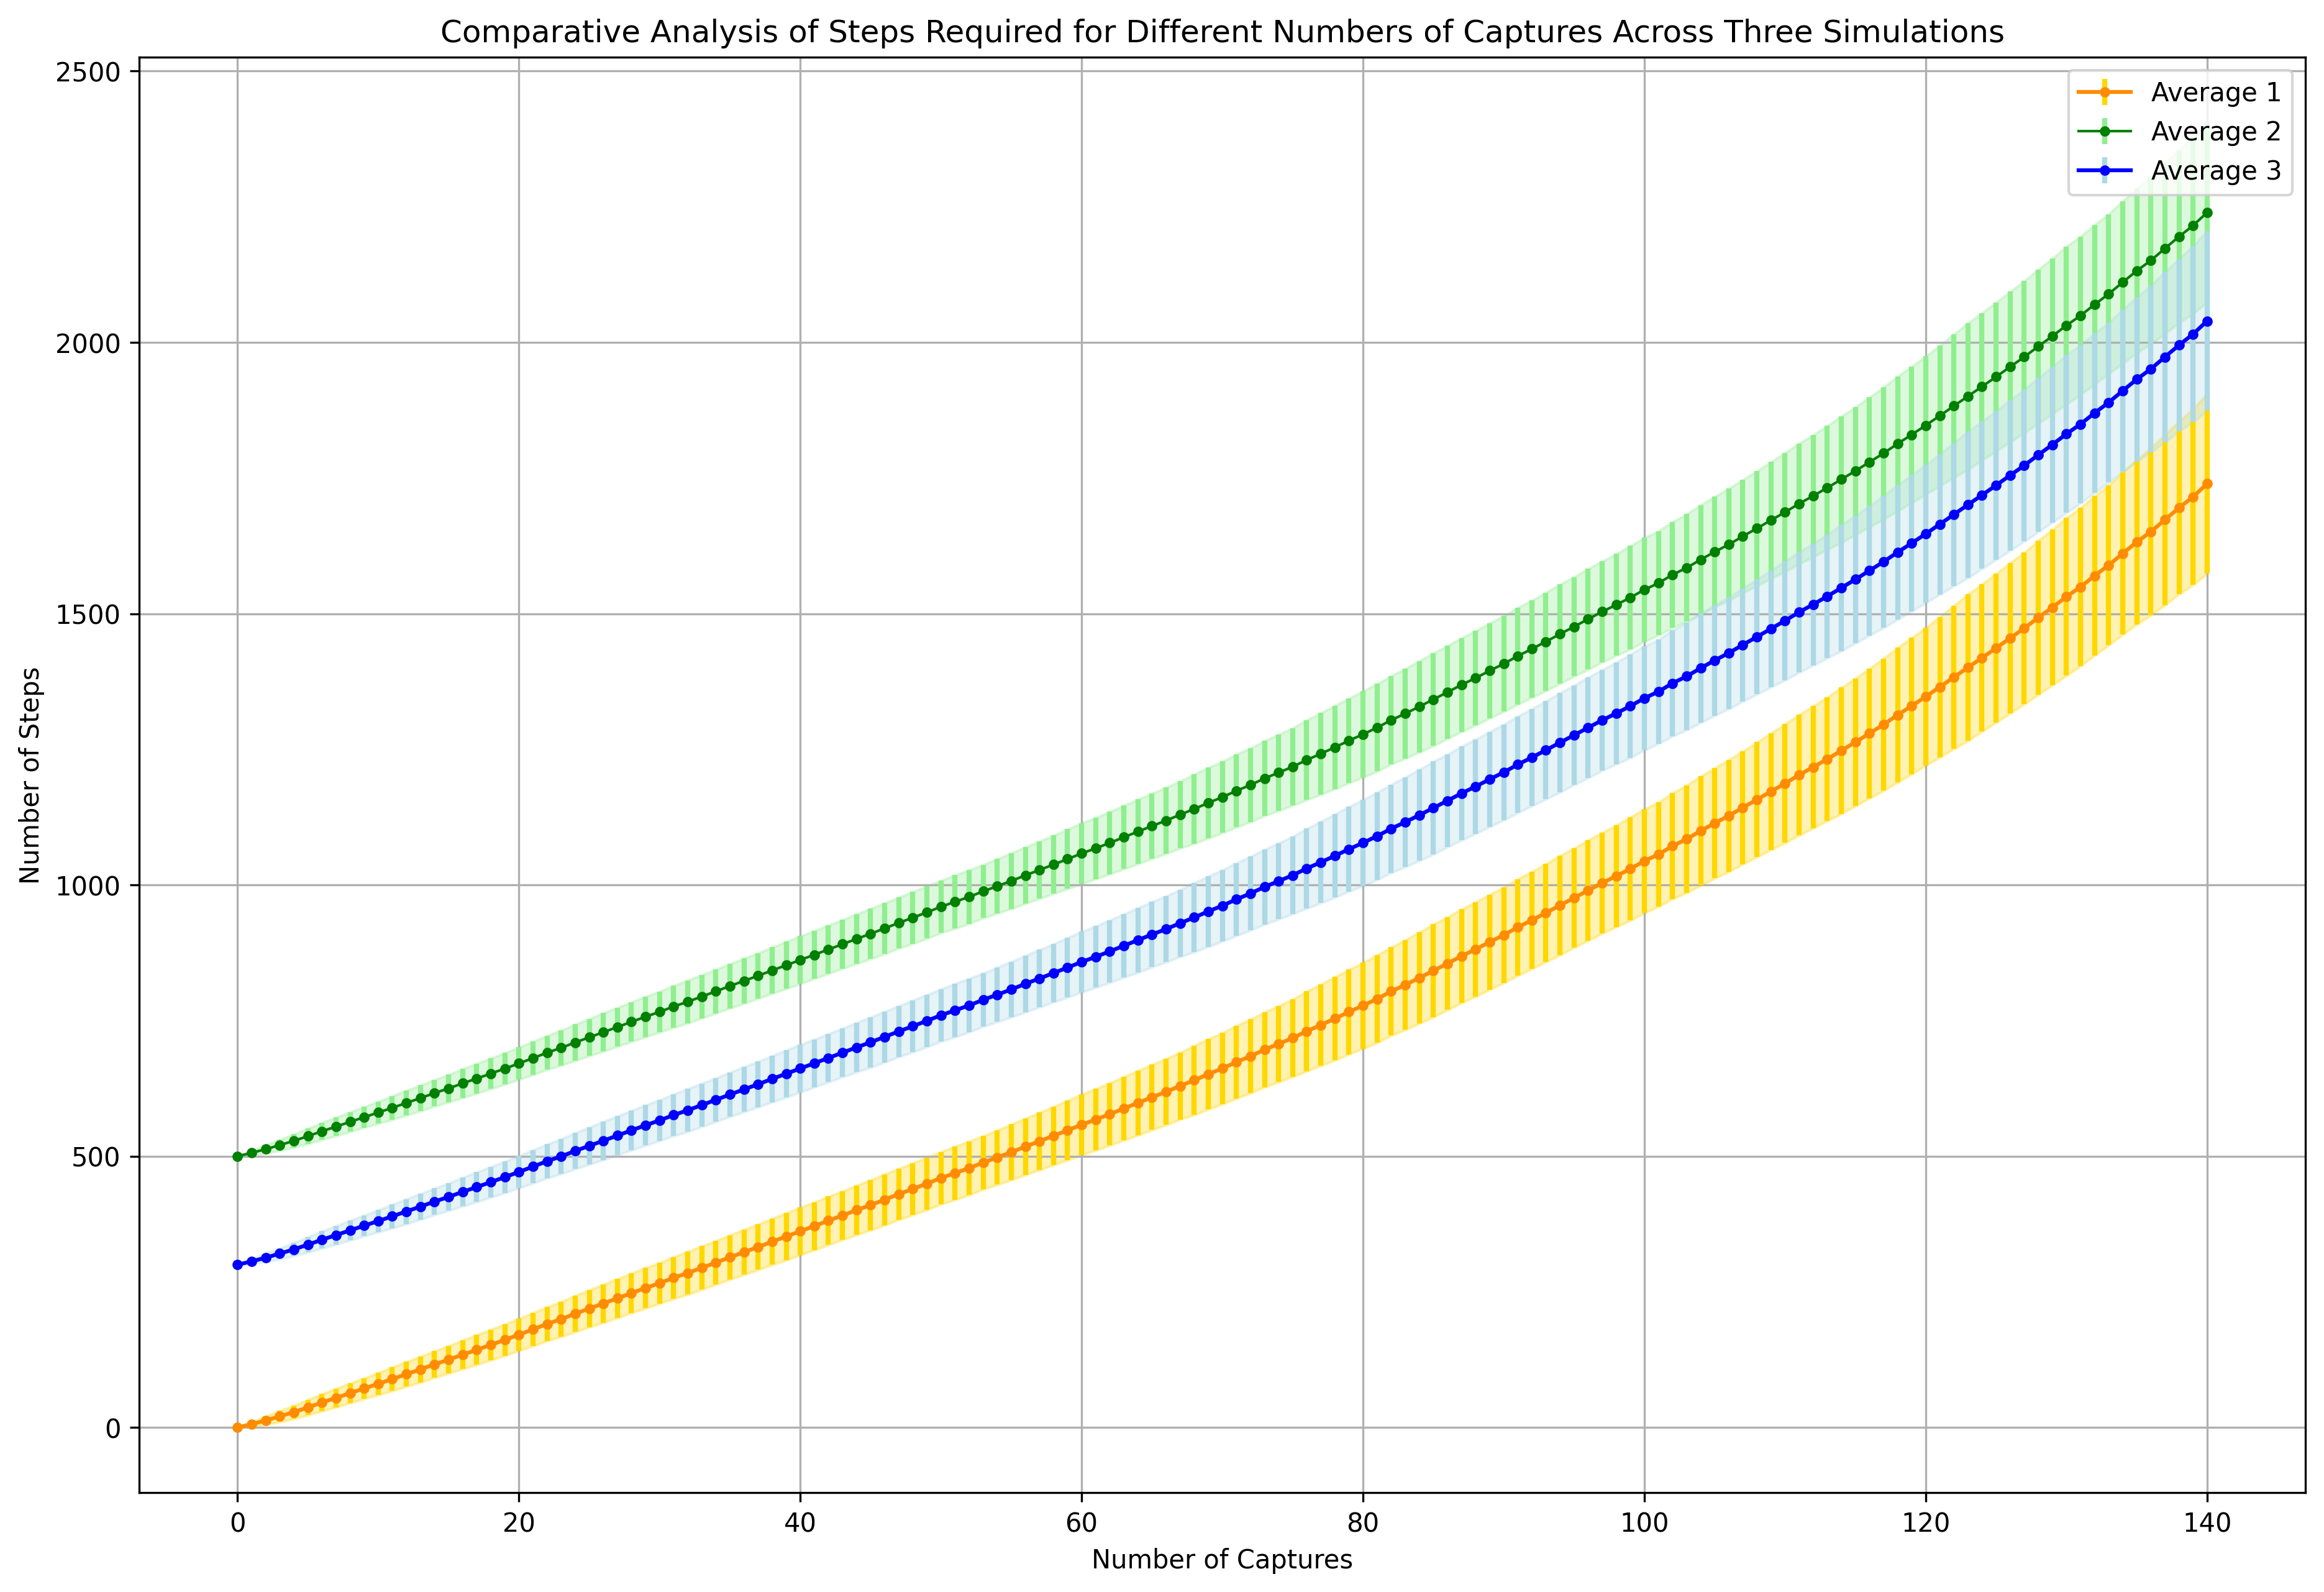

In [86]:
data2 = data.copy()
data2['n_steps'] = data2['n_steps'] + 500
data3 = data.copy()
data3['n_steps'] = data3['n_steps'] + 300

# Recalculate the mean and standard deviation
mean_steps = data.groupby('n_capture')['n_steps'].mean()
std_steps = data.groupby('n_capture')['n_steps'].std()

mean_steps2 = data2.groupby('n_capture')['n_steps'].mean()
std_steps2 = data2.groupby('n_capture')['n_steps'].std()

mean_steps3 = data3.groupby('n_capture')['n_steps'].mean()
std_steps3 = data3.groupby('n_capture')['n_steps'].std()

# Plotting again with shaded error bands, ensuring that all data is finite
plt.figure(figsize=(15, 10), dpi=300)
sns.set_palette(['gold', 'lightgreen', 'lightblue'])

# Plot for the original dataset with error bars
plt.errorbar(mean_steps.index, 
            mean_steps.values, 
            yerr=std_steps, 
            label='Average 1', 
            fmt='-o', 
            color='darkorange', 
            ecolor='gold', 
            elinewidth=2, 
            capsize=0, 
            markersize=3)
plt.fill_between(mean_steps.index, mean_steps - std_steps, mean_steps + std_steps, color='gold', alpha=0.3)

# Plot for the second dataset with error bars
plt.errorbar(mean_steps2.index, mean_steps2.values, 
            yerr=std_steps2, 
            label='Average 2', 
            fmt='-o', 
            color='green', 
            ecolor='lightgreen', 
            elinewidth=2, 
            capsize=0,
            linewidth=1,
            markersize=3)
plt.fill_between(mean_steps2.index, mean_steps2 - std_steps2, mean_steps2 + std_steps2, color='lightgreen', alpha=0.3)

# Plot for the third dataset with error bars
plt.errorbar(mean_steps3.index, 
            mean_steps3.values, 
            yerr=std_steps3, 
            label='Average 3', 
            fmt='-o', 
            color='blue', 
            ecolor='lightblue', 
            elinewidth=2, 
            capsize=0, 
            markersize=3)
plt.fill_between(mean_steps3.index, mean_steps3 - std_steps3, mean_steps3 + std_steps3, color='lightblue', alpha=0.3)

# Adding labels and title
plt.title('Comparative Analysis of Steps Required for Different Numbers of Captures Across Three Simulations')
plt.xlabel('Number of Captures')
plt.ylabel('Number of Steps')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Greedy

### Data

In [2]:
greedy_policy = GreedyPolicy(env.observation_space, env.action_space)

### Plot

## Naive

### Data

### Plot

## Draw together

# Put-back